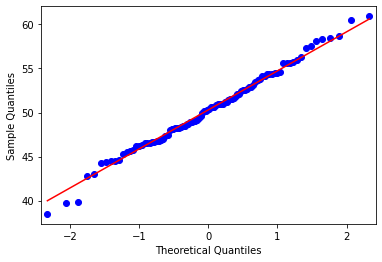

In [1]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [2]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)
Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


In [3]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


In [4]:
from scipy import stats
import numpy as np
#单样本t检验
sample=[809, 1250, 689, 1541, 995, 1234, 1024, 920, 777, 2510,
2301, 540, 850, 895, 1024, 1000, 1025, 863, 875, 1105]
sample = np.asarray(sample)
m = np.mean(sample)
print("样本均值:",m)
r = stats.ttest_1samp(sample, 1200, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

样本均值: 1111.35
statistic: -0.8043067483882222
pvalue: 0.43116914845890564


In [5]:
from scipy import stats
import numpy as np
 
#成对样本t检验
sample1=[68, 85, 123, 74, 88, 128, 63, 115, 110, 93, 99, 75, 89, 68, 140]
sample2=[60, 88, 132, 70, 95, 115, 74, 115, 121, 86, 96, 71, 96, 70, 143]
sample1 = np.asarray(sample1)
sample2 = np.asarray(sample2)
r = stats.ttest_rel(sample1,sample2)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: -0.492910604649229
pvalue: 0.6297167086230713


In [6]:
from scipy import stats
import numpy as np
 
#独立2个样本t检验
sample1=[5.5, 5.6, 6.3, 4.6, 5.3, 5.0, 6.2, 5.8, 5.1, 5.2, 5.9]
sample2=[3.8, 4.3, 4.2, 4.0, 4.9, 4.5, 5.2, 4.8, 4.5, 3.9, 3.7, 4.6]
sample1 = np.asarray(sample1)
sample2 = np.asarray(sample2)
r = stats.ttest_ind(sample1, sample2)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: 5.484377451921326
pvalue: 1.9279192737974777e-05


In [7]:
import numpy as np
from scipy import stats
 
data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])

f, p = stats.f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: 4.999999999999998
P value: 0.021683749320078414 



In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Alex   Jack  -3.3333 0.0435 -6.5755 -0.0911   True
  Alex    Pat     -3.5 0.0337 -6.7422 -0.2578   True
  Jack    Pat  -0.1667    0.9 -3.4089  3.0755  False
----------------------------------------------------
